<font size="5">Udacity Machine Learning Nanodegree Capstone Project</font>


<font size="5">Steve Tsiolis</font>

<font size="5">Creating Sample Dataset</font>


In [1]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('train.csv')

#Count how many url's there are per landmark_id
count_url = train_data[['landmark_id', 'url']].groupby(['landmark_id']).count()
#Display four rows to visualise table
count_url[0:4]

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,url
landmark_id,
0,61
1,3
10,5
100,56


In [2]:
#Put them in order from highest to lowest occuring landmark
desc_url=count_url.sort_values(['url'],ascending=False).reset_index(drop=False)
#Display four rows to visualise table
print (desc_url[0:4])

  landmark_id    url
0        9633  42619
1        6051  42572
2        6599  19786
3        9779  15631


In [3]:
#Find the median
data_half_size=(train_data['landmark_id'].nunique())//2
#Display number of classes for reader reference
classes = 140
print("dataset includes ",classes,"classes")
#index table to create sample in the range of the median
samp = desc_url.iloc[data_half_size - 70 :data_half_size + 70]
#Display four rows to visualise table
print(samp[:4])

dataset includes  140 classes
     landmark_id  url
7389       12315   12
7390       12316   12
7391       12317   12
7392        1529   12


In [4]:
#Apply previous to the train_data file so the URL is displayed for further use
training_samp = train_data[train_data['landmark_id'].isin(samp['landmark_id'])].reset_index(drop=True)
training_samp = training_samp[training_samp.columns[0:3]]
#Display four rows to visualise table
print(training_samp[:4])

                 id                                                url  \
0  e167479a3762155f  http://mw2.google.com/mw-panoramio/photos/medi...   
1  931f2579f1c7175a  https://lh4.googleusercontent.com/-_0ki-Hi6HBo...   
2  6fe3375b9cb9b1c6  http://static.panoramio.com/photos/original/23...   
3  8ec0b760fe80411c  http://mw2.google.com/mw-panoramio/photos/medi...   

  landmark_id  
0       12317  
1       11035  
2       13945  
3          59  


In [5]:
#Save to CSV
import csv
training_samp.to_csv('train_small.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
training_samp_df = pd.read_csv('train_small.csv')

In [6]:
#To analyse how the data looks
print("The size of the original dataset is :", train_data.shape[0],"images")
print("The original number of unique landmarks is :", 2*(data_half_size))
print("The size of the sampled training data is :", len(training_samp),"images")
print("4 rows of the training sample are: ")
training_samp[:4]

The size of the original dataset is : 1048575 images
The original number of unique landmarks is : 14918
The size of the sampled training data is : 1651 images
4 rows of the training sample are: 


,id,url,landmark_id
0,e167479a3762155f,http://mw2.google.com/mw-panoramio/photos/medi...,12317
1,931f2579f1c7175a,https://lh4.googleusercontent.com/-_0ki-Hi6HBo...,11035
2,6fe3375b9cb9b1c6,http://static.panoramio.com/photos/original/23...,13945
3,8ec0b760fe80411c,http://mw2.google.com/mw-panoramio/photos/medi...,59


<font size="5">How does the data look?</font>


In [7]:
#Show details of the data before sampling
train_data['landmark_id'].value_counts().describe()

count    14918.000000
mean        70.289248
std        607.389633
min          1.000000
25%          5.000000
50%         12.000000
75%         39.000000
max      42619.000000
Name: landmark_id, dtype: float64

In [8]:
#Show details of the data (note the std)
training_samp['landmark_id'].value_counts().describe()

count    140.000000
mean      11.792857
std        0.406714
min       11.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       12.000000
Name: landmark_id, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

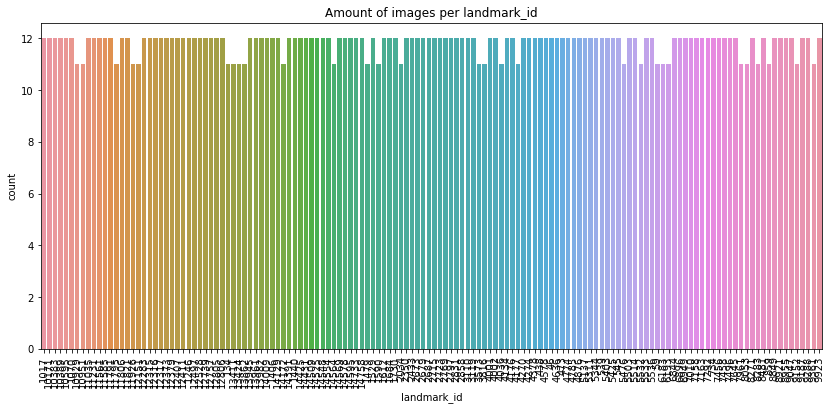

In [10]:
plt.figure(figsize = (14, 6))
g = sns.countplot(x="landmark_id", data=training_samp)
g.set_title("Amount of images per landmark_id", fontsize=12)
plt.xticks(rotation=90)
plt.show()

<font size="5">Split data into test, validation and train sets</font>


In [11]:
import numpy as np
import csv
#Initialise tables
p_train = None
p_validation = None
p_test = None
test_split = 0.20 #20% of data will be for testing
validation_split = 0.20 #20% of data will be for testing
train_split = 1-test_split-validation_split # train split proportion
iterate_by = training_samp.groupby('landmark_id')

for identifier, conc in iterate_by:
    #Applying the train/valid/test split
    prop_testing = int(test_split*len(conc))  # 15% for testing
    prop_validation = int(validation_split*len(conc))  # 15% for validating
    #performing the split using numpy
    tmp_test, tmp_validation, tmp_train = np.split(conc, [prop_testing, prop_testing + prop_validation])
    if p_train is None:
        p_train, p_validation, p_testing = (tmp_train, tmp_validation, tmp_test)
    else:
        p_train = p_train.append(tmp_train, ignore_index=True)
        p_validation = p_validation.append(tmp_validation, ignore_index=True)
        p_testing = p_testing.append(tmp_test, ignore_index=True)

        
print("There are: ",len(p_train),"images in the training set")
print("There are: ",len(p_validation),"images in the validation set")
print("There are: ",len(p_testing),"images in the testing set")

# Save to csv files
p_train.to_csv('info/p_train.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
p_validation.to_csv('info/p_validation.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
p_testing.to_csv('info/p_test.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)

There are:  1091 images in the training set
There are:  280 images in the validation set
There are:  280 images in the testing set


<font size="5">Download images</font>


In [ ]:
#Using the download script supplied on the kaggle Google landmarks challenge
from download_script import fetch
#Download the image sets in the respective folders
#For anyone running this - you can run it multiple times, it won't download something which is already downloaded
train_pics = fetch('info/p_train.csv', 'Download_pic/train_set')
validation_pics = fetch('info/p_validation.csv', 'Download_pic/validation_set')
test_pics = fetch('info/p_test.csv', 'Download_pic/test_set')

<font size="5">Pre Processing Data</font>

In [115]:
#preprocessing 
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input


#Preprocessing using horizontal flip and vertical flip
#Rescaling between [0,1] interval from [0,255]
train_datagen = ImageDataGenerator(rescale=1. /255,
                               horizontal_flip=True,
                               vertical_flip=True)

#Creating generators noting that Xception model requires (299,299) input
train_generator = train_datagen.flow_from_directory('Download_pic/train_set/',target_size=(299, 299),batch_size=1,class_mode=None,shuffle=False)

validation_generator = train_datagen.flow_from_directory('Download_pic/validation_set/',target_size=(299, 299),batch_size=1,class_mode=None,shuffle=False)

test_generator = train_datagen.flow_from_directory('Download_pic/test_set/',target_size=(299, 299),batch_size=1,class_mode=None,shuffle=False)


Found 1067 images belonging to 140 classes.
Found 277 images belonging to 140 classes.
Found 277 images belonging to 140 classes.


In [116]:
train_len=len(train_generator) // 1
validation_len=len(validation_generator) // 1
test_len=len(test_generator) // 1

<font size="5">Get bottleneck featuers</font>


In [117]:
from keras.applications import Xception
#Defining the model
Xception_model = Xception(input_shape = (299,299,3),weights='imagenet',include_top=False)

#Using predict_generator to create .npy files
train_Xception_model = Xception_model.predict_generator(train_generator,steps=train_len)
validation_Xception_model = Xception_model.predict_generator(validation_generator,steps=validation_len)
test_Xception_model = Xception_model.predict_generator(test_generator,steps=test_len)

#Saving files down
np.save(open('info/Xception/train_Xception.npy', 'wb'), train_Xception_model)
np.save(open('info/Xception/validation_Xception.npy', 'wb'), validation_Xception_model)
np.save(open('info/Xception/test_Xception.npy', 'wb'), test_Xception_model)


<font size="5">Load features</font>


In [118]:
#Loading the .npy files into the workspace
train_model_data = np.load(open('info/Xception/train_Xception.npy','rb'))
validation_model_data = np.load(open('info/Xception/validation_Xception.npy','rb'))
test_model_data = np.load(open('info/Xception/test_Xception.npy','rb'))
#Defining number of classes
train_num=len(train_generator.class_indices)

In [119]:
from keras.utils.np_utils import to_categorical

#creating train,validation and test targets
train_aim = to_categorical(train_generator.classes,num_classes=train_num)
validation_aim = to_categorical(validation_generator.classes,num_classes=train_num)
test_aim = to_categorical(test_generator.classes,num_classes=train_num)

<font size="5">Architecture</font>


In [120]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout, Dense

In [121]:
Xception_model_SGD = Sequential()
Xception_model_SGD.add(GlobalAveragePooling2D(input_shape=train_model_data.shape[1:]))
Xception_model_SGD.add(Dense(500, activation='relu'))
Xception_model_SGD.add(Dropout(0.4))
Xception_model_SGD.add(Dense(train_num, activation='softmax'))


In [122]:
Xception_model_Nadam = Sequential()
Xception_model_Nadam.add(GlobalAveragePooling2D(input_shape=train_model_data.shape[1:]))
Xception_model_Nadam.add(Dense(500, activation='relu'))
Xception_model_Nadam.add(Dropout(0.4))
Xception_model_Nadam.add(Dense(train_num, activation='softmax'))

In [123]:
Xception_model_RMS = Sequential()
Xception_model_RMS.add(GlobalAveragePooling2D(input_shape=train_model_data.shape[1:]))
Xception_model_RMS.add(Dense(500, activation='relu'))
Xception_model_RMS.add(Dropout(0.4))
Xception_model_RMS.add(Dense(train_num, activation='softmax'))

Xception_model_RMS.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_14  (None, 2048)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 500)               1024500   
_________________________________________________________________
dropout_14 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 140)               70140     
Total params: 1,094,640
Trainable params: 1,094,640
Non-trainable params: 0
_________________________________________________________________


<font size="5">Compile and train the model</font>


<font size="3">Which optimizer function is best?</font>

In [124]:
import keras
#https://keras.io/optimizers/
Xception_model_SGD.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.03, momentum=0.5, decay=0.0, nesterov=False), metrics=['accuracy'])

In [125]:
#Compile model
Xception_model_Nadam.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Nadam(lr=0.005, beta_1=0.9, beta_2=0.999, schedule_decay=0.004), metrics=['accuracy'])

In [126]:
#Compile model
Xception_model_RMS.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

<font size="5">Fitting the models</font>

In [127]:
from keras.callbacks import ModelCheckpoint
#Create checkpoint file to use for testing test data
callback_file_SGD = ModelCheckpoint(filepath='saved_models/weights.best.Xception_SGD.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
epoch_graph_SGD = Xception_model_SGD.fit(train_model_data,train_aim,epochs=50,batch_size=40,validation_data=(validation_model_data,validation_aim),callbacks=[callback_file_SGD])

Train on 1067 samples, validate on 277 samples
Epoch 1/50
1067/1067 [==============================] - 4s 3ms/step - loss: 4.9256 - acc: 0.0122 - val_loss: 4.7943 - val_acc: 0.0505
Epoch 2/50
1067/1067 [==============================] - 1s 705us/step - loss: 4.7261 - acc: 0.0740 - val_loss: 4.6360 - val_acc: 0.1805
Epoch 3/50
1067/1067 [==============================] - 1s 693us/step - loss: 4.5142 - acc: 0.1359 - val_loss: 4.4498 - val_acc: 0.2924
Epoch 4/50
1067/1067 [==============================] - 1s 752us/step - loss: 4.2546 - acc: 0.2643 - val_loss: 4.2173 - val_acc: 0.3610
Epoch 5/50
1067/1067 [==============================] - 1s 730us/step - loss: 4.0121 - acc: 0.3280 - val_loss: 3.9771 - val_acc: 0.4693
Epoch 6/50
1067/1067 [==============================] - 1s 749us/step - loss: 3.6775 - acc: 0.4039 - val_loss: 3.7017 - val_acc: 0.5199
Epoch 7/50
1067/1067 [==============================] - 1s 742us/step - loss: 3.3822 - acc: 0.4780 - val_loss: 3.4221 - val_acc: 0.5776
Epo

In [128]:
#Create checkpoint file to use for testing test data
callback_file_Nadam = ModelCheckpoint(filepath='saved_models/weights.best.Xception_Nadam.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
epoch_graph_Nadam = Xception_model_Nadam.fit(train_model_data,train_aim,epochs=50,batch_size=40,validation_data=(validation_model_data,validation_aim),callbacks=[callback_file_Nadam])

Train on 1067 samples, validate on 277 samples
Epoch 1/50
1067/1067 [==============================] - 4s 4ms/step - loss: 4.8369 - acc: 0.0600 - val_loss: 3.5978 - val_acc: 0.3032
Epoch 2/50
1067/1067 [==============================] - 1s 771us/step - loss: 2.7802 - acc: 0.3599 - val_loss: 2.1789 - val_acc: 0.4549
Epoch 3/50
1067/1067 [==============================] - 1s 748us/step - loss: 1.5846 - acc: 0.6082 - val_loss: 1.4384 - val_acc: 0.6101
Epoch 4/50
1067/1067 [==============================] - 1s 766us/step - loss: 0.8876 - acc: 0.7563 - val_loss: 1.0959 - val_acc: 0.7220
Epoch 5/50
1067/1067 [==============================] - 1s 776us/step - loss: 0.5589 - acc: 0.8500 - val_loss: 1.0538 - val_acc: 0.7220
Epoch 6/50
1067/1067 [==============================] - 1s 801us/step - loss: 0.3993 - acc: 0.9016 - val_loss: 0.8801 - val_acc: 0.7690
Epoch 7/50
1067/1067 [==============================] - 1s 735us/step - loss: 0.2522 - acc: 0.9363 - val_loss: 0.8956 - val_acc: 0.7473
Epo

In [129]:
#Create checkpoint file to use for testing test data
callback_file_RMS = ModelCheckpoint(filepath='saved_models/weights.best.Xception_RMS.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
epoch_graph_RMS = Xception_model_RMS.fit(train_model_data,train_aim,epochs=50,batch_size=40,validation_data=(validation_model_data,validation_aim),callbacks=[callback_file_RMS])

Train on 1067 samples, validate on 277 samples
Epoch 1/50
1067/1067 [==============================] - 4s 4ms/step - loss: 4.7413 - acc: 0.0872 - val_loss: 3.9981 - val_acc: 0.2816
Epoch 2/50
1067/1067 [==============================] - 1s 804us/step - loss: 3.4427 - acc: 0.3008 - val_loss: 2.9139 - val_acc: 0.4404
Epoch 3/50
1067/1067 [==============================] - 1s 755us/step - loss: 2.3275 - acc: 0.5276 - val_loss: 2.1159 - val_acc: 0.5921
Epoch 4/50
1067/1067 [==============================] - 1s 760us/step - loss: 1.5416 - acc: 0.7020 - val_loss: 1.6570 - val_acc: 0.6570
Epoch 5/50
1067/1067 [==============================] - 1s 751us/step - loss: 1.0662 - acc: 0.7863 - val_loss: 1.3800 - val_acc: 0.6968
Epoch 6/50
1067/1067 [==============================] - 1s 772us/step - loss: 0.7945 - acc: 0.8369 - val_loss: 1.1737 - val_acc: 0.7437
Epoch 7/50
1067/1067 [==============================] - 1s 764us/step - loss: 0.5335 - acc: 0.9063 - val_loss: 1.0338 - val_acc: 0.7509
Epo

<font size="5">Comparing training and validation accuracy</font>

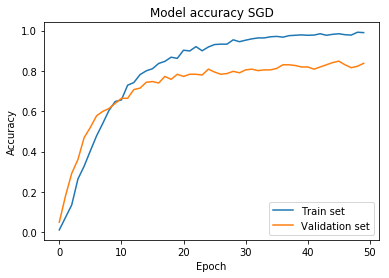

In [158]:
fig, ax = plt.subplots()
plt.plot(epoch_graph_SGD.history['acc'])
plt.plot(epoch_graph_SGD.history['val_acc'])
plt.title('Model accuracy SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation set'], loc='lower right')
plt.show()

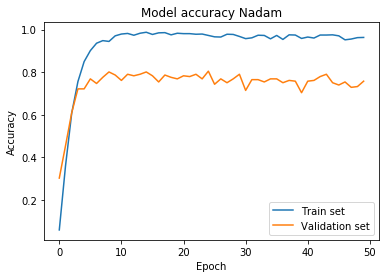

In [159]:
fig, ax = plt.subplots()
plt.plot(epoch_graph_Nadam.history['acc'])
plt.plot(epoch_graph_Nadam.history['val_acc'])
plt.title('Model accuracy Nadam')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation set'], loc='lower right')
plt.show()

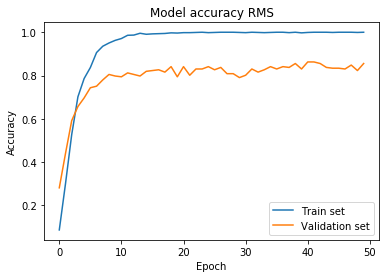

In [160]:
fig, ax = plt.subplots()
plt.plot(epoch_graph_RMS.history['acc'])
plt.plot(epoch_graph_RMS.history['val_acc'])
plt.title('Model accuracy RMS')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation set'], loc='lower right')
plt.show()

<font size="5">Test the accuracy using the test data</font>

In [133]:
#Loading the best checkpoint weight file
Xception_model_SGD.load_weights('saved_models/weights.best.Xception_SGD.hdf5')
Xception_predictions_SGD = [np.argmax(Xception_model_SGD.predict(np.expand_dims(feature, axis=0))) for feature in test_model_data]
Xception_prob_SGD = [np.amax(Xception_model_SGD.predict(np.expand_dims(feature, axis=0))) for feature in test_model_data]
# report test accuracy
test_accuracy_SGD = 100*np.sum(np.array(Xception_predictions_SGD)==np.argmax(test_aim, axis=1))/len(Xception_predictions_SGD)
print('Test accuracy using the SGD optimizer is: %.4f%%' % test_accuracy_SGD)

Test accuracy using the SGD optimizer is: 78.3394%


In [134]:
#Loading the best checkpoint weight file
Xception_model_Nadam.load_weights('saved_models/weights.best.Xception_Nadam.hdf5')
Xception_predictions_Nadam = [np.argmax(Xception_model_Nadam.predict(np.expand_dims(feature, axis=0))) for feature in test_model_data]
# report test accuracy
test_accuracy_Nadam = 100*np.sum(np.array(Xception_predictions_Nadam)==np.argmax(test_aim, axis=1))/len(Xception_predictions_Nadam)
print('Test accuracy using the Nadam optimizer is: %.4f%%' % test_accuracy_Nadam)

Test accuracy using the Nadam optimizer is: 76.8953%


In [135]:
#Loading the best checkpoint weight file
Xception_model_RMS.load_weights('saved_models/weights.best.Xception_RMS.hdf5')
Xception_predictions_RMS = [np.argmax(Xception_model_RMS.predict(np.expand_dims(feature, axis=0))) for feature in test_model_data]
Xception_prob_RMS = [np.amax(Xception_model_RMS.predict(np.expand_dims(feature, axis=0))) for feature in test_model_data]
# report test accuracy
test_accuracy_RMS = 100*np.sum(np.array(Xception_predictions_RMS)==np.argmax(test_aim, axis=1))/len(Xception_predictions_RMS)
print('Test accuracy using the RMS optimizer is: %.4f%%' % test_accuracy_RMS)

Test accuracy using the RMS optimizer is: 81.9495%


<font size="5">Global Average Precision (GAP)</font>


In [154]:
# Calculate GAP score
from numpy import argsort,argmax,array
NAP = []
#Sorting the arrays 
iden = argsort(Xception_prob_RMS)[::-1]

Xception_gap=[Xception_predictions_RMS[inp] for inp in iden]

test_aim_gap=[test_aim[inp] for inp in iden]
#Iterating part of the equation
for i in range(len(iden)):
    NAP.append(np.sum(array(Xception_gap[:(i+1)]) == argmax(test_aim_gap[:(i+1)], axis=1)) / len(Xception_gap[:(i+1)]))
#Solving for Global Average Precision
GAP = np.divide(sum(NAP),len(NAP))

print("The Global Average Precision is ",GAP)
   

The Global Average Precision is  0.967107444461


<font size="5">Sensitivity analysis</font>

In [137]:
#preprocessing 
#Rescaling between [0,1] interval from [0,255]
train_datagen_sensitive = ImageDataGenerator(rescale=1. /255)

#Creating generators noting that Xception model requires (299,299) input
train_generator_sensitive = train_datagen.flow_from_directory('Download_pic/train_set/',target_size=(299, 299),batch_size=1,class_mode=None,shuffle=False)

Found 1067 images belonging to 140 classes.


In [138]:
train_len_sensitive=len(train_generator_sensitive) // 1

In [139]:
#Defining the sensitivity analysis model
Xception_model_sensitive = Xception(input_shape = (299,299,3),weights='imagenet',include_top=False)

In [140]:
#Using predict_generator to create .npy files
train_Xception_model_sensitive = Xception_model_sensitive.predict_generator(train_generator_sensitive,steps=train_len)
#Saving files down
np.save(open('info/Xception/train_Xception_sensitive.npy', 'wb'), train_Xception_model_sensitive)


In [141]:
train_model_data_sensitive = np.load(open('info/Xception/train_Xception_sensitive.npy','rb'))
#Defining number of classes
train_num_sensitive=len(train_generator_sensitive.class_indices)
#Create target for sensitivity train data set
train_aim_sensitivity = to_categorical(train_generator.classes,num_classes=train_num)

In [142]:
#Using the same model architecture
Sensitive_model = Sequential()
Sensitive_model.add(GlobalAveragePooling2D(input_shape=train_model_data.shape[1:]))
Sensitive_model.add(Dense(500, activation='relu'))
Sensitive_model.add(Dropout(0.4))
Sensitive_model.add(Dense(train_num, activation='softmax'))

In [143]:
#Compile model
Sensitive_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [144]:
#Create checkpoint file to use for testing test data
callback_file_sensitive = ModelCheckpoint(filepath='saved_models/weights.best.Sensitive.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
#Run model for 50 epochs
epoch_graph_sensitive = Sensitive_model.fit(train_model_data,train_aim,epochs=50,batch_size=40,validation_data=(validation_model_data,validation_aim),callbacks=[callback_file_sensitive])


Train on 1067 samples, validate on 277 samples
Epoch 1/50
1067/1067 [==============================] - 4s 4ms/step - loss: 4.7657 - acc: 0.0637 - val_loss: 4.0387 - val_acc: 0.2852
Epoch 2/50
1067/1067 [==============================] - 1s 719us/step - loss: 3.4538 - acc: 0.2980 - val_loss: 2.9456 - val_acc: 0.4332
Epoch 3/50
1067/1067 [==============================] - 1s 708us/step - loss: 2.3180 - acc: 0.5192 - val_loss: 2.1229 - val_acc: 0.6245
Epoch 4/50
1067/1067 [==============================] - 1s 763us/step - loss: 1.5356 - acc: 0.7076 - val_loss: 1.5983 - val_acc: 0.6715
Epoch 5/50
1067/1067 [==============================] - 1s 771us/step - loss: 1.0591 - acc: 0.7938 - val_loss: 1.3357 - val_acc: 0.7148
Epoch 6/50
1067/1067 [==============================] - 1s 753us/step - loss: 0.7174 - acc: 0.8510 - val_loss: 1.1058 - val_acc: 0.7798
Epoch 7/50
1067/1067 [==============================] - 1s 777us/step - loss: 0.5130 - acc: 0.9110 - val_loss: 0.9597 - val_acc: 0.7978
Epo

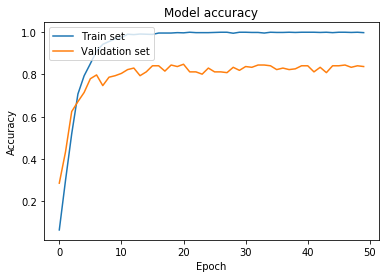

In [155]:
fig, ax = plt.subplots()
plt.plot(epoch_graph_sensitive.history['acc'])
plt.plot(epoch_graph_sensitive.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Validation set'], loc='upper left')
plt.show()

In [147]:
#Loading the best checkpoint weight file
Sensitive_model.load_weights('saved_models/weights.best.Sensitive.hdf5')

In [148]:
#Code used and tweaked from Udacity Machine Learning Nanodegree Deep learning dog classifier assignment
#https://github.com/udacity/dog-project
Xception_predictions_sensitive = [np.argmax(Sensitive_model.predict(np.expand_dims(feature, axis=0))) for feature in test_model_data]
# report test accuracy
test_accuracy = 100*np.sum(np.array(Xception_predictions_sensitive)==np.argmax(test_aim, axis=1))/len(Xception_predictions_sensitive)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 80.1444%


<font size="5">Predicting the images</font>

In [150]:
#Code used and tweaked from Udacity Machine Learning Nanodegree Deep learning dog classifier assignment
#https://github.com/udacity/dog-project
from info.extract_bottleneck_features import *
from glob import glob
land_id = [item[0:-1] for item in sorted(glob("Download_pic/train_set/*/"))]
def predict_image_class(img_path):
    #To extract the bottleneck features
    bottleneck_feature = extract_Xception(path_to_tensor(img_path))
    #Feed features as input to the model
    predicted_vector = Xception_model_RMS.predict(bottleneck_feature)
    #Return breed
    return land_id[np.argmax(predicted_vector)]

In [151]:
import matplotlib.image as mpi
def landmark_prediction(path_of_image):
    img = mpi.imread(path_of_image)
    plt.imshow(img)
    landmark_id = predict_image_class(path_of_image)
    print('Predicted landmark_id: {}'.format(landmark_id)) 

Predicted landmark_id: Download_pic/train_set/14733


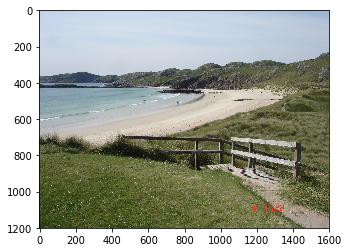

In [152]:
landmark_prediction('Download_pic/test_set/14733/68997d4902364db2.jpg')

Predicted landmark_id: Download_pic/train_set/14425


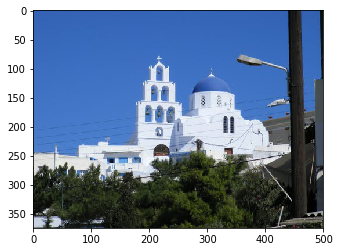

In [50]:
landmark_prediction('Download_pic/test_set/14425/635e1d617cee013d.jpg')

Predicted landmark_id: Download_pic/train_set/7163


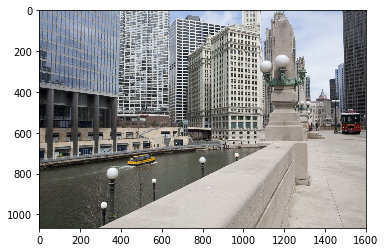

In [51]:
landmark_prediction('Download_pic/test_set/7163/629998ae73669170.jpg')

In [52]:
print("done")

done
